# Homework 05

## Due Tuesday, March 29th

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import shapely.geometry

### 1. Flyover states

_[This is very similar to the exercise done in class. This is a continuation.]_

What states do you see when you fly from LA (airport code LAX) to NYC (airport code EWR)?

> LAX: 33.9425° N, 118.4081° W

> EWR: 40.6925° N, 74.1686° W

Load in the `states_21basic` shapefile using these commands:

    from mpl_toolkits.basemap import Basemap
    m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
            urcrnrlon=-50.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-100.,lat_ts=20.)
    m.readshapefile('../materials/states_21basic/states', 'states')

The boundary information for all of the states is now held in an attribute of the map object `m.states`, which is a list of lists of x-y pairs denoting the boundaries. Next use the `m.gcpoints` function to get the points along the great circle path. Convert all of these things into Shapely objects, and check for intersections. Add a buffer of 100km to the flight path to see what states you might potentially see along the way. Use this analysis to provide the following:

1. Create and display a map that shows the flight path, with the states that are seen along the flight path clearly highlighted in some way.

2. Use the information in m.states_info to extract and print a list containing the names of the states seen, with unique names. (see `np.unique`)


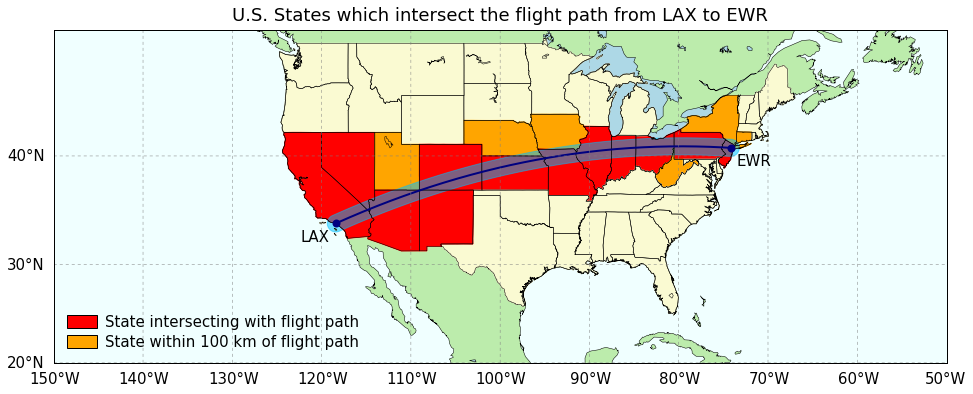

In [88]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_axis_bgcolor('azure')

m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)

m.fillcontinents(color='lightsage', lake_color='lightblue')
m.drawcoastlines(linewidth=0.5)

m.readshapefile('../python4geosciences/materials/states_21basic/states', 'states')
states = [shapely.geometry.Polygon(m.state) for m.state in m.states]

xp, yp = m.gcpoints(-118.4081, 33.9425, -74.1686, 40.6925, 1000)
path = shapely.geometry.LineString(list(zip(xp, yp)))

states_seen = []
colors = ['red', 'orange']
for i, state in enumerate(states):
    if state.intersects(path):
        color = colors[0]
        states_seen.append(m.states_info[i]['STATE_NAME'])
    elif state.intersects(path.buffer(100000)):
        color = colors[1]
        states_seen.append(m.states_info[i]['STATE_NAME'])
    else:
        color = 'lightgoldenrodyellow'
    ax.fill(*state.boundary.xy, color=color)
ax.fill(*path.buffer(100000).boundary.xy, color='deepskyblue', alpha=0.5)
m.plot(*path.xy, color='navy', linewidth=2)
m.plot([xp[0], xp[-1]], [yp[0], yp[-1]], linestyle='None', 
       color='navy', marker='o', markersize=8, markeredgecolor='none')
ax.text(xp[0]-100000/np.sqrt(2), yp[0]-100000/np.sqrt(2), 'LAX', fontsize=15, 
        horizontalalignment='right', verticalalignment='top')
ax.text(xp[-1]+100000/np.sqrt(2), yp[-1]-100000/np.sqrt(2), 'EWR', fontsize=15, 
        horizontalalignment='left', verticalalignment='top')

m.drawparallels(np.arange(20,51,10), labels=[1,0,0,0], fontsize=15, color='gray', 
                linewidth=.5, dashes=[3, 3])
m.drawmeridians(np.arange(-150,-49,10), labels=[0,0,0,1], fontsize=15, color='gray', 
                linewidth=.5, dashes=[3, 3])

ll = []
for i in range(len(colors)):
    ll.append(plt.Rectangle((0, 0), 1, 1, facecolor=colors[i]))
labels = ['State intersecting with flight path', 'State within 100 km of flight path']
ax.legend(ll, labels, fontsize=15, loc='lower left', frameon=False, handlelength=2, 
          handleheight=1, handletextpad=.5, labelspacing=.3, borderaxespad=.5)
ax.set_title('U.S. States which intersect the flight path from LAX to EWR', 
             verticalalignment='bottom', fontsize=18)
plt.show()

In [92]:
print('The states seen along the flight path from LAX to EWR:\n', 
      '\n'.join(np.unique(states_seen)), sep='')

The states seen along the flight path from LAX to EWR:
Arizona
California
Colorado
Connecticut
Illinois
Indiana
Iowa
Kansas
Missouri
Nebraska
Nevada
New Jersey
New Mexico
New York
Ohio
Pennsylvania
Utah
West Virginia


### 2. Area in a Voronoi diagram

Given the series of points:

     np.array([[ 0.77354201,  0.34072038],
               [ 0.43807549,  0.93001924],
               [ 0.5624092 ,  0.79438991],
               [ 0.02536295,  0.46180244],
               [ 0.59533179,  0.07522803],
               [ 0.47867418,  0.70302822],
               [ 0.30371564,  0.83135442],
               [ 0.5856915 ,  0.16340903],
               [ 0.14700491,  0.60268997],
               [ 0.97098631,  0.51692456]])
               
create a Voronoi diagram, and calculate the area contained in the finite regions. What fraction of the total area is at least 0.001 unit away from any boundary? 0.01 away? And 0.1 away?


In [56]:
from scipy import spatial
import shapely.ops

pts = np.array([[ 0.77354201,  0.34072038],
                [ 0.43807549,  0.93001924],
                [ 0.5624092 ,  0.79438991],
                [ 0.02536295,  0.46180244],
                [ 0.59533179,  0.07522803],
                [ 0.47867418,  0.70302822],
                [ 0.30371564,  0.83135442],
                [ 0.5856915 ,  0.16340903],
                [ 0.14700491,  0.60268997],
                [ 0.97098631,  0.51692456]])

vrn = spatial.Voronoi(pts)

finiteregions = []
polygons = []
for indices in vrn.regions:
    if not indices: continue
    if -1 in indices: continue
    finiteregions.append(indices)
    polygons.append(shapely.geometry.Polygon(vrn.vertices[indices, :]))

polygon = shapely.ops.cascaded_union(polygons)

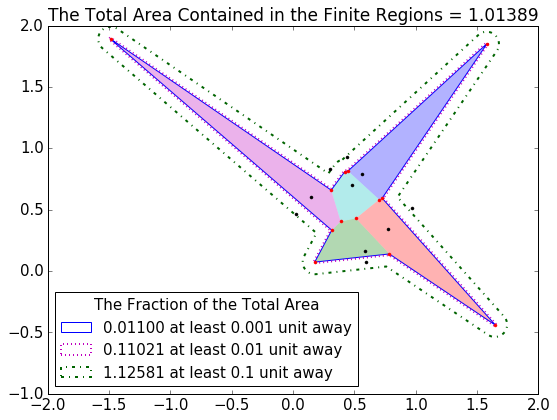

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))

for region in finiteregions:
    ax.fill(vrn.vertices[region, 0], vrn.vertices[region, 1], edgecolor='none', alpha=0.3)

away = [0.001, 0.01, 0.1]
ecolors = ['b', 'm', 'darkgreen']
lstyles = ['-', ':', '-.']
lwidths = [1, 2, 2]
for i in range(len(away)):
    ax.fill(*polygon.buffer(away[i]).boundary.xy, linewidth=lwidths[i], linestyle= lstyles[i], 
            facecolor='none', edgecolor=ecolors[i], label='{:.5f} at least {} unit away'
            .format(polygon.buffer(away[i]).area/polygon.area-1, away[i]))

ax.plot(pts[:, 0], pts[:, 1], '.k')
ax.plot(vrn.vertices[:, 0], vrn.vertices[:, 1], '.r')
ax.tick_params(labelsize=15)
ax.set_aspect(1.)
ax.set_title('The Total Area Contained in the Finite Regions = {:.5f}'.format(polygon.area), 
             fontsize=17)
legend = ax.legend(loc='lower left', fontsize=15, title='The Fraction of the Total Area')
plt.setp(legend.get_title(), fontsize=15)
fig.tight_layout()
plt.show()

### 3. 2D interpolation

Data (found in `python4geosciences/data/MS03_L15.txt`) gathered from a field cruise out of the TAMU Oceanography department is randomly located in space (that is, unstructured) because of the nature of the measurement: the instrument is lowered into the water from a ship, and is brought up and down through the water column as the ship moves to get a sampling of the fields.

Read in the data file and plot the temperature in a `scatter` plot as a function of depth and latitude. Next, interpolate the temperature data to be on a uniform grid (to make it structured). Now, plot it using `contourf`, which requires structured data. Experiment with different spacing in your uniform grid, and with different numbers of contours to see how the results change, and choose values that provide a nice-looking image which closely resembles the original data.

In [77]:
MS03_L15 = np.loadtxt('../python4geosciences/data/MS03_L15.txt', comments='*')

lttd = MS03_L15[:, 0]
dpth = MS03_L15[:, 2]
tmpr = MS03_L15[:, 3]

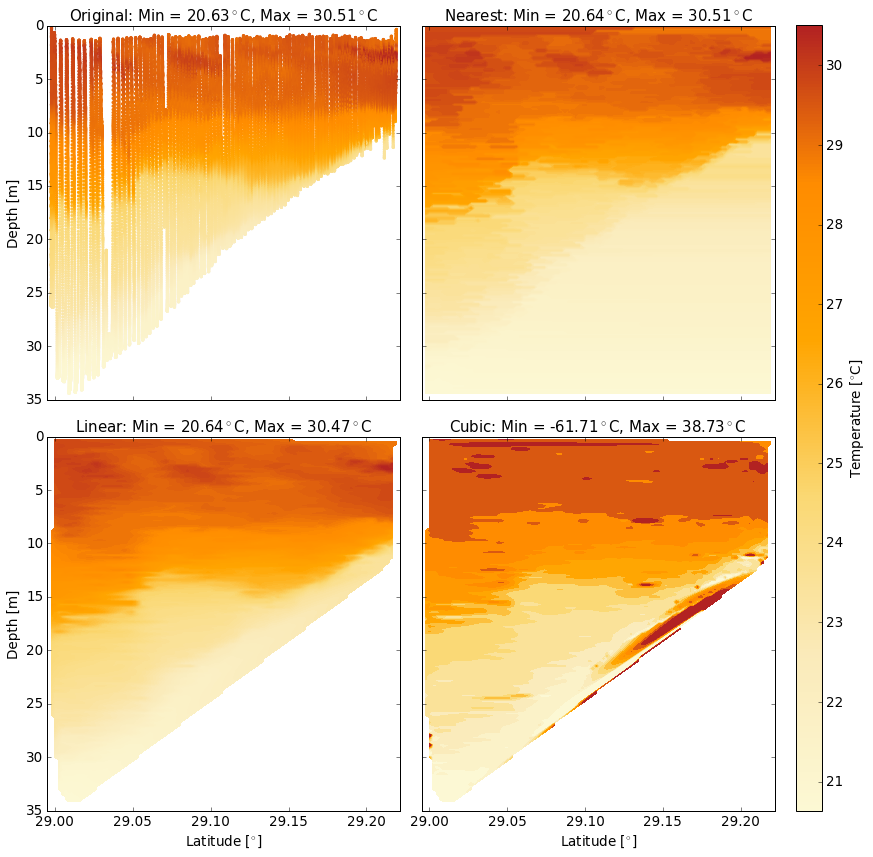

In [78]:
from scipy import interpolate
from matplotlib.colors import LinearSegmentedColormap

points = np.vstack((lttd, dpth)).T
values = tmpr

ygrid, xgrid = np.mgrid[dpth.min():dpth.max():150j, lttd.min():lttd.max():100j]
xi = np.vstack((xgrid.flat, ygrid.flat)).T

tmp_colors = ['#FCF8D4', '#FAEAB9', '#FAD873', '#FFA500', '#FF8C00', '#B22222']
tmp_cmap = LinearSegmentedColormap.from_list('tmp cmaps', tmp_colors)

nrow = 2
ncol = 2
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 12), sharex=True, sharey=True)

methods = ['original', 'nearest', 'linear', 'cubic']
for i, ax in enumerate(axes.flat):
    if i == 0:
        cs = ax.scatter(lttd, dpth, s=10, c=tmpr, cmap=tmp_cmap, edgecolor='none', \
                        vmin=tmpr.min(), vmax=tmpr.max())
        ax.set_xlim(lttd.min()-0.0025, lttd.max()+0.0025)
        ax.set_ylim(np.floor(dpth.min()), np.ceil(dpth.max()))
        ax.invert_yaxis()
        tmin, tmax = tmpr.min(), tmpr.max()
    else:
        zgrid = interpolate.griddata(points, values, xi, method=methods[i])
        zgrid.shape = xgrid.shape
        zgrid = np.ma.masked_where(np.isnan(zgrid), zgrid)
        ax.contourf(xgrid, ygrid, zgrid, 100, cmap=tmp_cmap, vmin=tmpr.min(), vmax=tmpr.max())
        tmin, tmax = zgrid.min(), zgrid.max()
    if i%2 == 0:
        ax.set_ylabel('Depth [m]', fontsize=13.5)
    if i >= ncol:
        ax.set_xlabel('Latitude [$^{\circ}$]', fontsize=13.5)
    ax.tick_params(labelsize=13.5)
    ax.set_title('{}: Min = {:.2f}$^\circ$C, Max = {:.2f}$^\circ$C'\
                 .format(methods[i].title(), tmin, tmax), fontsize=15)
fig.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.925, 0.056, 0.03, 0.91])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=13.5)
cbar.set_label('Temperature [$^{\circ}$C]', fontsize=13.5)

plt.show()

Even though it was not asked which interpolation method is best for this case, after experimenting different methods along with different spacing in the uniform grid and different numbers of contours, the result using the linear interpolation method appears to closely resemble the original data.

### 4. (Grad) Area of Greenland and Australia in different projections

Set up Basemap instances of the following projections: Mercator, Robinson, and Mollweide; make sure that all three projections are set up to show both Greenland and Australia at the same time (this is necessary for Mercator in particular). Plot them side-by-side to see how they compare.

Next, read in the shape files for Greenland and Australia, found in the `data` directory; you can do this with something like the following (but you might need to change the directory path):

> m.readshapefile('../python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
> m.readshapefile('../python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

where `m` is a `Basemap` instance. This gives you a series of polygons that make up each country, saved in `m.greenland` and `m.australia`. Find the area of the two countries in each projection and compare them. What is the area of Australia relative to the area of Greenland for each projection, and how does this compare to what it is in reality?

---
Greenland lies between latitudes 59° and 83°N, and longitudes 11° and 74°W, while Australia lies between latitudes 9° and 44°S, and longitudes 112° and 154°E. Therefore, the projections (especially for Mercator) should include the area between latitudes 44°S and 83°N, and longitudes 74°W and 154°E.

Note: Though all the projections should be plotted side-by-side, they are stacked for better presentation and comparison.

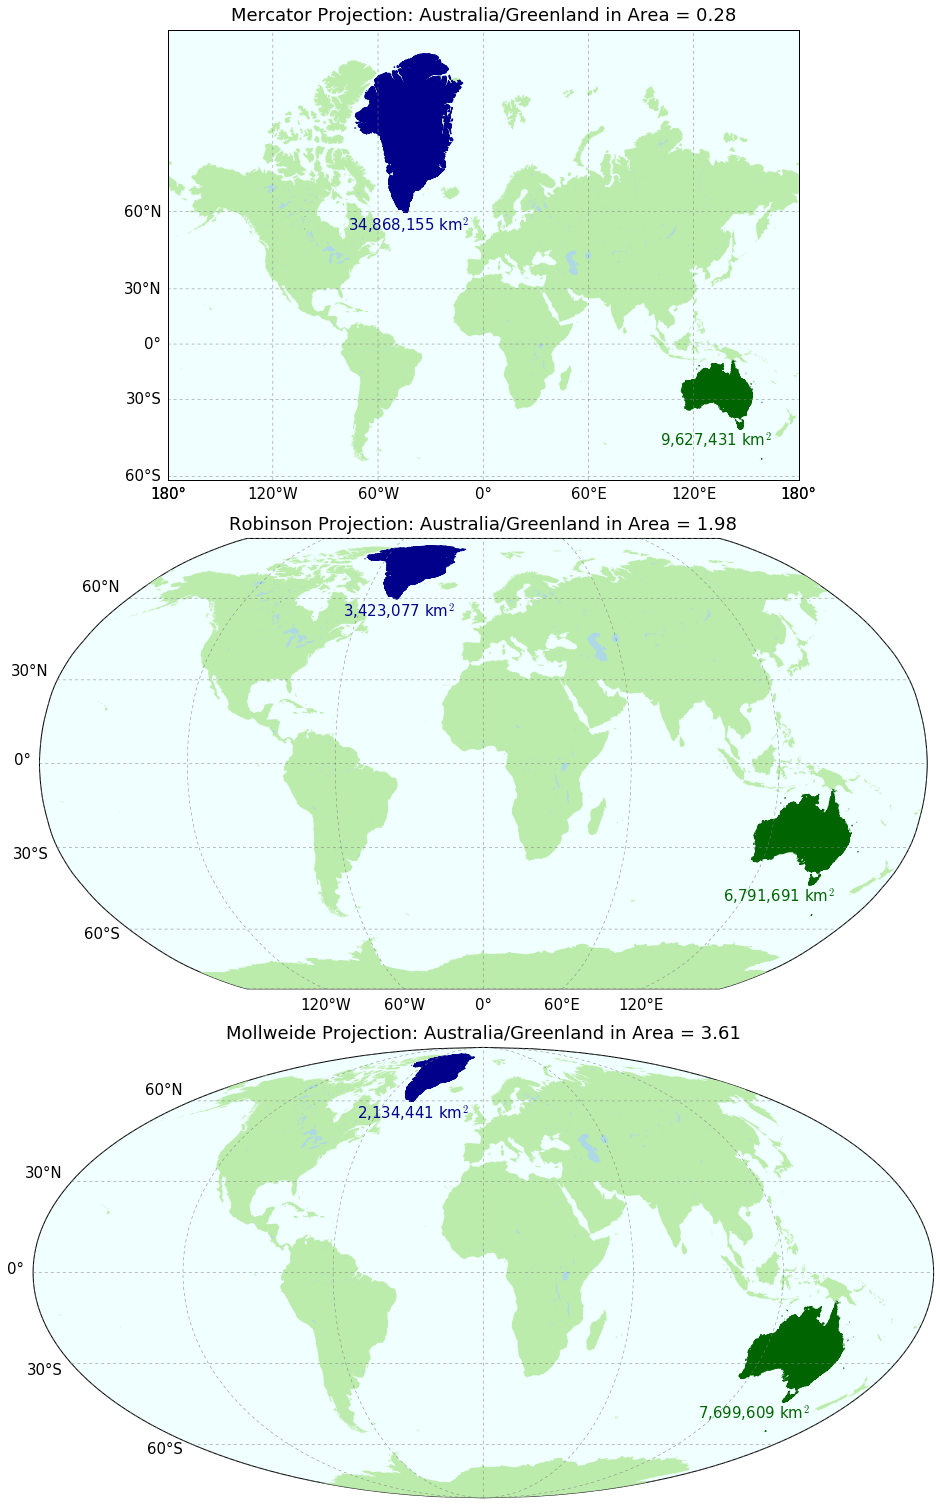

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(13, 21))

proj_name = ['Mercator', 'Robinson', 'Mollweide']
proj = ['merc', 'robin', 'moll']
path = ['GRL_adm_shp/GRL_adm0', 'AUS_adm_shp/AUS_adm0']
lon = [-(11+74)*0.5, (112+154)*0.5]
lat = [59, -44]
color = ['darkblue', 'darkgreen']
for i, ax in enumerate(axes.flat):
    if i == 0:
        m = Basemap(projection=proj[i], lat_0=0, lon_0=0,
            llcrnrlon=-180.,llcrnrlat=-61., urcrnrlon=180.,urcrnrlat=85.,
            resolution='l', ax=ax)
    else:
        m = Basemap(projection=proj[i], lon_0=0, resolution='l', ax=ax)
    m.drawmapboundary(fill_color='azure')
    m.fillcontinents(color='lightsage', lake_color='lightblue')
    m.drawparallels(np.arange(-90,91,30), labels=[1,0,0,0], fontsize=15, color='gray', 
                    linewidth=.5, dashes=[3, 3])
    if i == 2:
        m.drawmeridians(np.arange(-180,181,60), color='gray', linewidth=.5, dashes=[3, 3])
    else:
        m.drawmeridians(np.arange(-180,181,60), labels=[0,0,0,1], fontsize=15, color='gray', 
                    linewidth=.5, dashes=[3, 3])
    tarea = []
    for j in range(len(path)):
        m.readshapefile('../python4geosciences/data/'+path[j], 'country', drawbounds=False)
        country = [shapely.geometry.Polygon(m.division) for m.division in m.country]
        [ax.fill(*division.boundary.xy, color=color[j]) for division in country]
        areas = [division.area for division in country]
        xtext, ytext = m(lon[j], lat[j])
        ax.text(xtext, ytext, '{:,.0f} km$^2$'.format(sum(areas)/1000000), color=color[j], 
                fontsize=15, horizontalalignment='center', verticalalignment='top')
        tarea.append(sum(areas))
    ax.set_title('{} Projection: Australia/Greenland in Area = {:.2f}'
                 .format(proj_name[i], tarea[1]/tarea[0]), verticalalignment='bottom', 
                 fontsize=18)

fig.tight_layout()
fig.subplots_adjust(hspace=.13)

In [89]:
aarea = [2166086, 7692024]
print('Actual Australia/Greenland in Area = {:.2f}, \nwhere '.format(aarea[1]/aarea[0])+
      'Greenland = {:,} km\u00b2 and Australia = {:,} km\u00b2'.format(aarea[0], aarea[1]))

Actual Australia/Greenland in Area = 3.55, 
where Greenland = 2,166,086 km² and Australia = 7,692,024 km²


Therefore, 
* in the Mercator projection, even though the total calculated area of Australia is larger than its actual area, the area of Greenland is so exaggerated that the ratio of Australia to Greenland is far from the actual ratio.
* In the Robinson projection, the calculated area of Australia is smaller than the actual value, while the area of Greenland is bigger. Thus, the ratio of the two countries' areas is off from the actual ratio.
* For the Mollweide projection, the area of the two countries is calculated as close as their actual values among three projections. Still, the area of Australia is a little bigger than in reality and the calculated area of Greenland is a little smaller. So their ratio is a little bigger than the actual ratio, but it is the closest among all the projections.

Note: As in problem 2, I wanted to use `shapely.ops.cascaded_union` function for calculating the area of two countries. But since it took so much time to be done probably because of the number of polygons used (~6000), I had to find another way around to produce the same result.